<h3 align="center"><font size="15">Projet 5 : Classifiez automatiquement des biens de consommation</font></h3>

<h3 align="center"><font size="6.5">SIFT</font></h3>

* [Chapitre 1 : Préparation des images](#chapter1)
    * [Importation des données et des librairies](#section_1_1)
    * [Création de fonctions](#section_1_2)        
       
* [Chapitre 2 : Scale-invariant feature transform (SIFT)](#chapter2)
    * [100 descripteurs](#section_2_1)
        * [Création des descripteurs](#section_2_1_1)  
        * [Segmentation](#section_2_1_2)
        * [Meilleur segmentation 1](#section_2_1_3)   
            * [Création des histogrammes](#section_2_1_3_1) 
            * [Visualisation t-SNE](#section_2_1_3_2)
            * [Matrice de confusion](#section_2_1_3_3)
        * [Meilleur segmentation 2](#section_2_1_4)   
            * [Création des histogrammes](#section_2_1_4_1) 
            * [Visualisation t-SNE](#section_2_1_4_2)
            * [Matrice de confusion](#section_2_1_4_3)
    * [500 descripteurs](#section_2_2)
        * [Création des descripteurs](#section_2_2_1)  
        * [Segmentation](#section_2_2_2)
        * [Meilleur segmentation 1](#section_2_2_3)   
            * [Création des histogrammes](#section_2_2_3_1) 
            * [Visualisation t-SNE](#section_2_2_3_2)
            * [Matrice de confusion](#section_2_2_3_3)
        * [Meilleur segmentation 2](#section_2_2_4)   
            * [Création des histogrammes](#section_2_2_4_1) 
            * [Visualisation t-SNE](#section_2_2_4_2)
            * [Matrice de confusion](#section_2_2_4_3)
    * [1000 descripteurs](#section_2_3)
        * [Création des descripteurs](#section_2_3_1)  
        * [Segmentation](#section_2_3_2)
        * [Meilleur segmentation 1](#section_2_3_3)   
            * [Création des histogrammes](#section_2_3_3_1) 
            * [Visualisation t-SNE](#section_2_3_3_2)
            * [Matrice de confusion](#section_2_3_3_3)
        * [Meilleur segmentation 2](#section_2_3_4)   
            * [Création des histogrammes](#section_2_3_4_1) 
            * [Visualisation t-SNE](#section_2_3_4_2)
            * [Matrice de confusion](#section_2_3_4_3)
    * [Test brut](#section_2_4)
        * [Création des descripteurs](#section_2_4_1)  
        * [Segmentation](#section_2_4_2)
        * [Meilleur segmentation 1](#section_2_4_3)   
            * [Création des histogrammes](#section_2_4_3_1) 
            * [Visualisation t-SNE](#section_2_4_3_2)
            * [Matrice de confusion](#section_2_4_3_3)
        
* [Chapitre 3 : Oriented FAST and Rotated BRIEF (ORB)](#chapter3)
    * [Création des descripteurs](#section_3_1)  
    * [Création des vecteurs à traiter](#section_3_2)
        * [Segmentation](#section_3_2_1)
        * [Création des histogrammes](#section_3_2_2)
    * [Visualisation t-SNE](#section_3_3)
    * [Matrice de confusion](#section_3_4)

<a class="anchor" id="chapter1"></a>
# Chapitre 1 : Préparation des images

<a class="anchor" id="section_1_1"></a>
## Importation des données et des librairies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
import scipy.stats as st
import random
import itertools
import datetime
import time
import statsmodels.api as sm
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import cluster, metrics, manifold, decomposition, preprocessing
from sklearn import manifold, decomposition
from sklearn.cluster import KMeans, MiniBatchKMeans
from scipy.optimize import linear_sum_assignment
from matplotlib.collections import LineCollection
from matplotlib import colors
from itertools import chain
from matplotlib.lines import Line2D

from PIL import Image, ImageOps 
from skimage.feature import hog, ORB, match_descriptors


data = pd.read_csv("data_projet_6.csv", low_memory=False, index_col=0)

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1050 entries, 0 to 1049
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [3]:
import Fonction_P6 as p6

In [4]:
lab_category = data["category_label"].values
n_clusters = len(data["Main_category"].unique())

<a class="anchor" id="section_1_2"></a>
## Création de fonctions

In [5]:
import cv2

path = 'C:/Users/farid/Anaconda/Notebook/Dataset_p6/'

liste_image_equal = []
for i in range (0, data.shape[0]):
    
    img = cv2.imread(path + data.iloc[i]["image"])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_equal = cv2.equalizeHist(gray)
    liste_image_equal.append(gray_equal)
    
display(len(liste_image_equal))

1050

In [6]:
def descriptors_sift(nfeatures):
    
    number_image = []
    descriptors = []
    
    if nfeatures!=0:
        sift = cv2.xfeatures2d.SIFT_create(nfeatures = nfeatures)
    else :
        sift = cv2.xfeatures2d.SIFT_create()
        
    time1 = time.time()
    
    for i in range (0, data.shape[0]):
           
        keypoints_i, descriptors_i = sift.detectAndCompute(liste_image_equal[i], None)
    
        test = (data.iloc[i]["image"])
        ind_image = (data.index[data["image"]==test]).item()
    
        for d in descriptors_i:
            number_image.append(ind_image)
            descriptors.append(d)
                  
    time2 = np.round(time.time() - time1, 0)
    print(f"Temps de créations des descripteurs : ", time2)
        
    return number_image, descriptors

    
def histogram_sift(k_means, number_image, descriptors):
    
    time1 = time.time()            
    histo = np.zeros(len(k_means.cluster_centers_))
    keypoints = []
    
    df_descriptors = pd.DataFrame(list(zip(number_image, descriptors)), columns = [["Numéro_image", "Descriptor"]])
    
    df_descriptors["label"] = k_means.labels_
    
    j = 0    
    k = 0
    
    for num in df_descriptors["Numéro_image"].values:
        
        if (num == k):
            
            idx = df_descriptors.iloc[j]["label"]
            histo[idx] += 1
            j += 1
                
        elif (num != k):
            
            keypoints.append(histo)
            histo = np.zeros(len(k_means.cluster_centers_))
            
            k += 1
            
            idx = df_descriptors.iloc[j]["label"]
            histo[idx] += 1
            
            j += 1

    keypoints.append(histo)
    
    time2 = np.round(time.time() - time1, 0)
    print(f"Temps de création des features : ", time2)
    
    return keypoints    

In [7]:
def descriptors_orb(nfeatures):
    
    number_image = []
    descriptors = []
    
    if nfeatures!=0:
        orb = cv2.ORB_create(nfeatures = nfeatures)
    else :
        orb = cv2.ORB_create()
        
    time1 = time.time()
    
    for i in range (0, data.shape[0]):
           
        keypoints_i, descriptors_i = orb.detectAndCompute(liste_image_equal[i], None)
    
        test = (data.iloc[i]["image"])
        ind_image = (data.index[data["image"]==test]).item()
    
        for d in descriptors_i:
            number_image.append(ind_image)
            descriptors.append(d)
                  
    time2 = np.round(time.time() - time1, 0)
    print(f"Temps de créations des descripteurs : ", time2)
        
    return number_image, descriptors


<a class="anchor" id="chapter2"></a>
# Chapitre 2 : Scale-invariant feature transform (SIFT)

<a class="anchor" id="section_2_1"></a>
## 100 descripteurs

<a class="anchor" id="section_2_1_1"></a>
### Création des descripteurs

In [8]:
number_image_100, descriptors_100 = descriptors_sift(100)

Temps de créations des descripteurs :  699.0


In [9]:
X_descriptors_100 = np.asarray(descriptors_100)

display(X_descriptors_100.shape)

(105402, 128)

<a class="anchor" id="section_2_1_2"></a>
### Segmentation

In [10]:
from sklearn.cluster import MiniBatchKMeans

time1 = time.time()
inertia_sift_100 = []
sil_sift_100 = []
davies_sift_100 = []

sample_sil = int(round(len(descriptors_100)/25))

K_range_sift_100 = range(30, 201)

for k in K_range_sift_100:
    mini_k_means_100 = MiniBatchKMeans(n_clusters=k,  random_state = 0, batch_size=5120).fit(X_descriptors_100)
    inertia_sift_100.append(mini_k_means_100.inertia_)
    
    sil = metrics.silhouette_score(X_descriptors_100, mini_k_means_100.labels_, 
                                   sample_size = sample_sil, random_state = 0)
    sil_sift_100.append(sil)
    
    dav = metrics.davies_bouldin_score(X_descriptors_100, mini_k_means_100.labels_)
    davies_sift_100.append(dav)
        
    if (k % 20 == 0):
        
        time2 = np.round(time.time() - time1, 0)
        print(f"temps {k} clusters : ", time2)

temps 40 clusters :  44.0
temps 60 clusters :  143.0
temps 80 clusters :  267.0
temps 100 clusters :  415.0
temps 120 clusters :  585.0
temps 140 clusters :  780.0
temps 160 clusters :  1001.0
temps 180 clusters :  1251.0
temps 200 clusters :  1528.0


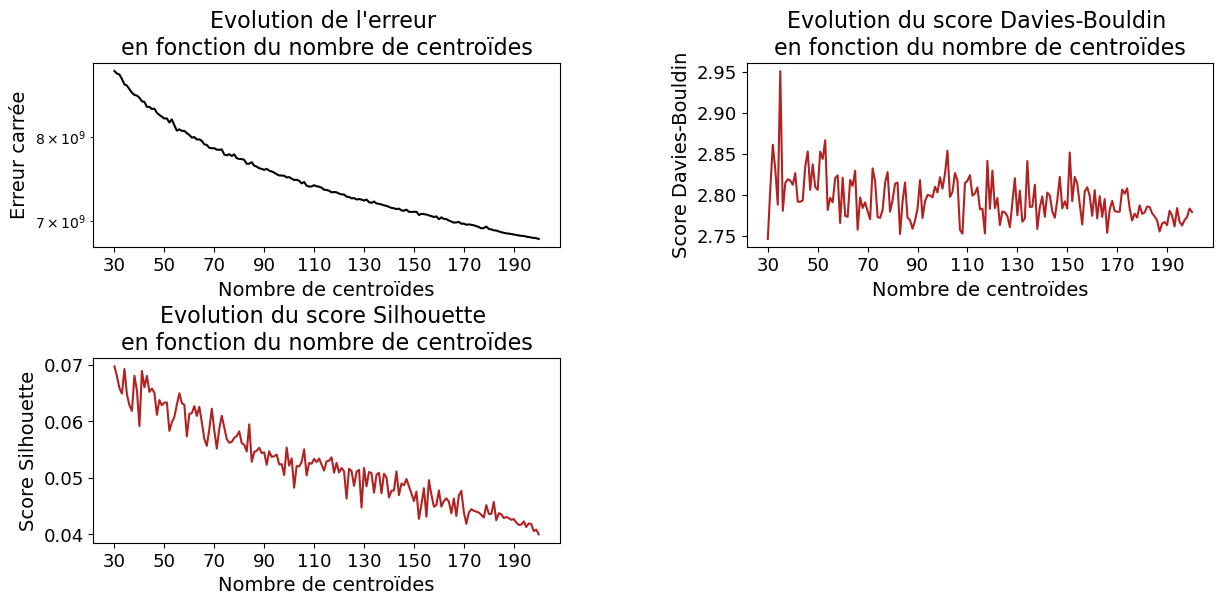

In [11]:
plt.figure(figsize=(14,6))

plt.subplot(221)
plt.plot(K_range_sift_100, inertia_sift_100, color="black")

plt.xticks(K_range_sift_100[::20], fontsize = 13)
plt.yticks(fontsize = 13)

plt.yscale("log")

plt.xlabel("Nombre de centroïdes", fontsize = 14)
plt.ylabel("Erreur carrée", fontsize = 14)

plt.title("Evolution de l'erreur \nen fonction du nombre de centroïdes", fontsize = 16)

plt.subplot(222)

plt.plot(K_range_sift_100, davies_sift_100, color="firebrick")

plt.xticks(K_range_sift_100[::20], fontsize = 13)
plt.yticks(fontsize = 13)

plt.xlabel("Nombre de centroïdes", fontsize = 14)
plt.ylabel("Score Davies-Bouldin", fontsize = 14)

plt.title("Evolution du score Davies-Bouldin \nen fonction du nombre de centroïdes", fontsize = 16)

plt.subplot(223)

plt.plot(K_range_sift_100, sil_sift_100, color="firebrick")

plt.xticks(K_range_sift_100[::20], fontsize = 13)
plt.yticks(fontsize = 13)

plt.xlabel("Nombre de centroïdes", fontsize = 14)
plt.ylabel("Score Silhouette", fontsize = 14)

plt.title("Evolution du score Silhouette \nen fonction du nombre de centroïdes", fontsize = 16)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.6)
plt.show()

<a class="anchor" id="section_2_1_3"></a>
### Centroïdes = 82

<a class="anchor" id="section_2_1_3_1"></a>
#### Création des histogrammes

In [10]:
mini_k_means_100_db = MiniBatchKMeans(n_clusters=82, random_state = 0, batch_size = 5120).fit(X_descriptors_100)

In [11]:
keypoints_100_db = histogram_sift(mini_k_means_100_db, number_image_100, descriptors_100)

Temps de création des features :  25.0


<a class="anchor" id="section_2_1_3_2"></a>
#### Visualisation t-SNE

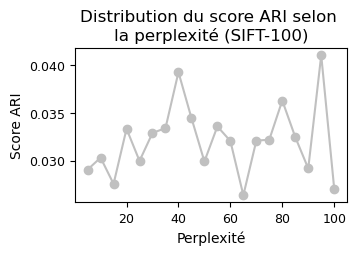

In [12]:
best_perp_sift_100 = p6.best_perplexity(lab_category, keypoints_100_db, "SIFT-100", 
                                        perp_min = 5, perp_max = 105, step = 5, n_clusters = n_clusters)

Pour le modèle SIFT-100, le score ARI est : 0.04101


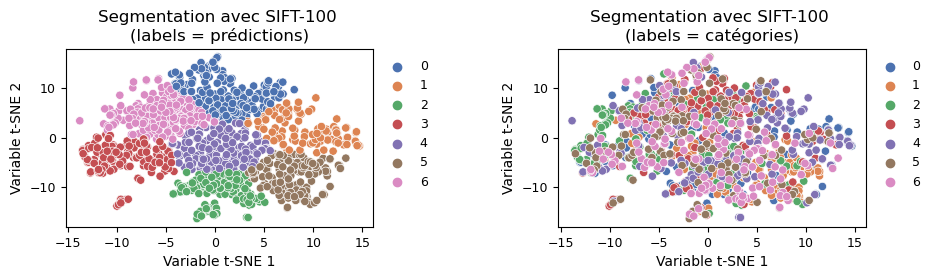

In [13]:
ARI_SIFT_100_db, label_SIFT_100_db = p6.graph_t_sne("SIFT-100", best_perp_sift_100, 
                                                    keypoints_100_db, lab_category, n_clusters = 7)

<a class="anchor" id="section_2_1_3_3"></a>
#### Matrice de confusion

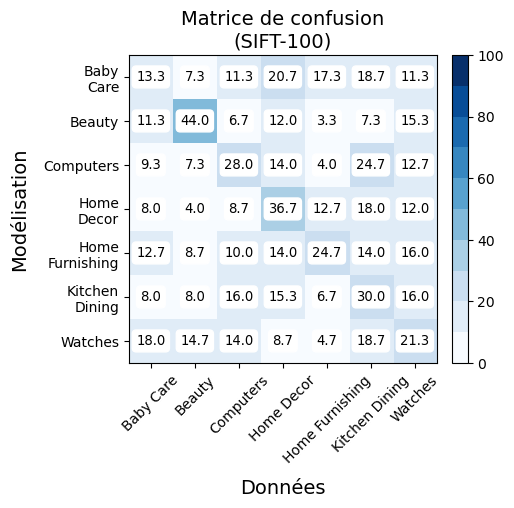

In [14]:
data["label_SIFT_100_db"] = label_SIFT_100_db

p6.graph_matrix(data["category_label"], data["label_SIFT_100_db"], "SIFT-100")

<a class="anchor" id="section_2_1_4"></a>
### Centroïdes = 30

<a class="anchor" id="section_2_1_4_1"></a>
#### Création des histogrammes

In [15]:
mini_k_means_100 = MiniBatchKMeans(n_clusters=30, random_state = 0, batch_size = 5120).fit(X_descriptors_100)

In [16]:
keypoints_100 = histogram_sift(mini_k_means_100, number_image_100, descriptors_100)

Temps de création des features :  26.0


<a class="anchor" id="section_2_1_4_2"></a>
#### Visualisation t-SNE

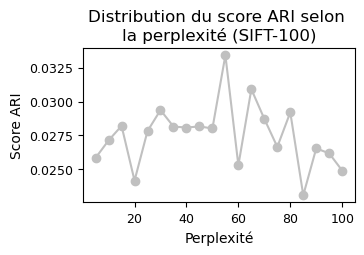

In [17]:
best_perp_sift_100_bis = p6.best_perplexity(lab_category, keypoints_100, "SIFT-100", 
                                            perp_min = 5, perp_max = 105, 
                                            step = 5, n_clusters = n_clusters)

Pour le modèle SIFT-100, le score ARI est : 0.03342


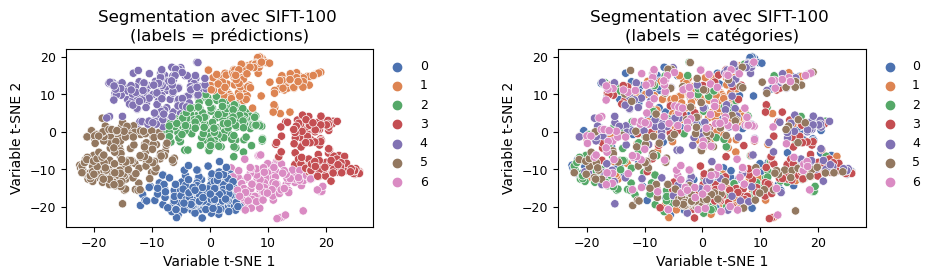

In [18]:
ARI_SIFT_100_sil, label_SIFT_100_sil = p6.graph_t_sne("SIFT-100", best_perp_sift_100_bis, 
                                                      keypoints_100, lab_category, n_clusters = 7)

<a class="anchor" id="section_2_1_4_3"></a>
#### Matrice de confusion

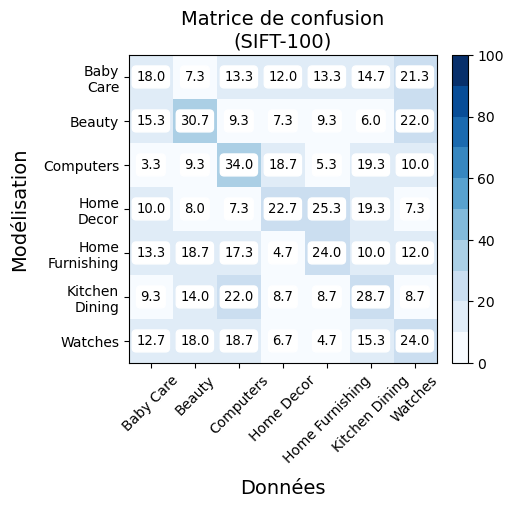

In [19]:
data["label_SIFT_100"] = label_SIFT_100_sil

p6.graph_matrix(data["category_label"], data["label_SIFT_100"], "SIFT-100")

<a class="anchor" id="section_2_2"></a>
## 500 descripteurs

<a class="anchor" id="section_2_2_1"></a>
### Création des descripteurs

In [20]:
number_image_500, descriptors_500 = descriptors_sift(500)

Temps de créations des descripteurs :  730.0


In [21]:
X_descriptors_500 = np.asarray(descriptors_500)

display(X_descriptors_500.shape)

(517297, 128)

<a class="anchor" id="section_2_2_2"></a>
### Segmentation

In [24]:
time1 = time.time()
inertia_sift_500 = []

sil_sift_500 = []
sample_silh_500 = int(round(len(descriptors_500)/25))

davies_sift_500 = []

K_range_sift_500 = range(30, 201)

for k in K_range_sift_500:
    mini_k_means_500 = MiniBatchKMeans(n_clusters=k,  random_state = 0, batch_size=5120).fit(descriptors_500)
    inertia_sift_500.append(mini_k_means_500.inertia_)
    
    sil = metrics.silhouette_score(descriptors_500, mini_k_means_500.labels_, sample_size = sample_silh_500, random_state = 0)
    sil_sift_500.append(sil)
    
    dav = metrics.davies_bouldin_score(descriptors_500, mini_k_means_500.labels_)
    davies_sift_500.append(dav)
        
    if (k % 20 == 0):
        
        time2 = np.round(time.time() - time1, 0)
        print(f"temps {k} clusters : ", time2)

temps 40 clusters :  154.0
temps 60 clusters :  437.0
temps 80 clusters :  730.0
temps 100 clusters :  1030.0
temps 120 clusters :  1338.0
temps 140 clusters :  1660.0
temps 160 clusters :  1986.0
temps 180 clusters :  2318.0
temps 200 clusters :  2659.0


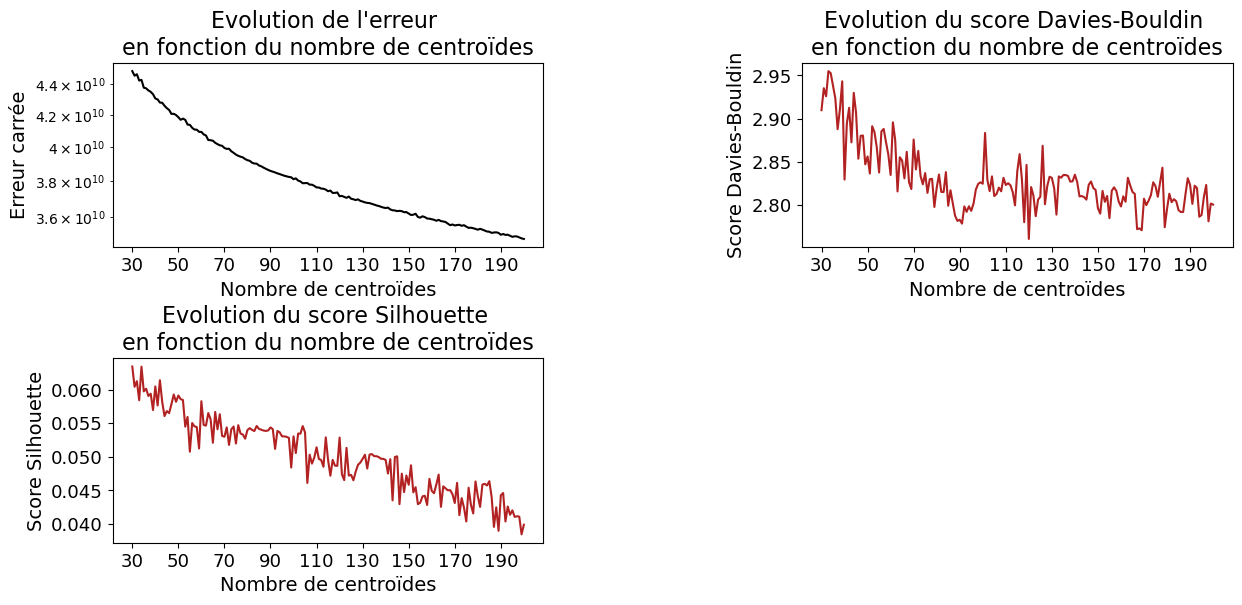

In [25]:
plt.figure(figsize=(14,6))

plt.subplot(221)
plt.plot(K_range_sift_500, inertia_sift_500, color="black")

plt.xticks(K_range_sift_500[::20], fontsize = 13)
plt.yticks(fontsize = 13)

plt.yscale("log")

plt.xlabel("Nombre de centroïdes", fontsize = 14)
plt.ylabel("Erreur carrée", fontsize = 14)

plt.title("Evolution de l'erreur \nen fonction du nombre de centroïdes", fontsize = 16)

plt.subplot(222)

plt.plot(K_range_sift_500, davies_sift_500, color="firebrick")

plt.xticks(K_range_sift_500[::20], fontsize = 13)
plt.yticks(fontsize = 13)

plt.xlabel("Nombre de centroïdes", fontsize = 14)
plt.ylabel("Score Davies-Bouldin", fontsize = 14)

plt.title("Evolution du score Davies-Bouldin \nen fonction du nombre de centroïdes", fontsize = 16)

plt.subplot(223)

plt.plot(K_range_sift_500, sil_sift_500, color="firebrick")

plt.xticks(K_range_sift_500[::20], fontsize = 13)
plt.yticks(fontsize = 13)

plt.xlabel("Nombre de centroïdes", fontsize = 14)
plt.ylabel("Score Silhouette", fontsize = 14)

plt.title("Evolution du score Silhouette \nen fonction du nombre de centroïdes", fontsize = 16)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.6, 
                    hspace=0.6)
plt.show()

<a class="anchor" id="section_2_2_3"></a>
### Centroïdes = 120

<a class="anchor" id="section_2_2_3_1"></a>
#### Création des histogrammes

In [22]:
mini_k_means_500 = MiniBatchKMeans(n_clusters=120,  random_state=0, batch_size=5120).fit(X_descriptors_500)

In [23]:
keypoints_500 = histogram_sift(mini_k_means_500, number_image_500, descriptors_500)

Temps de création des features :  126.0


<a class="anchor" id="section_2_2_3_2"></a>
#### Visualisation t-SNE

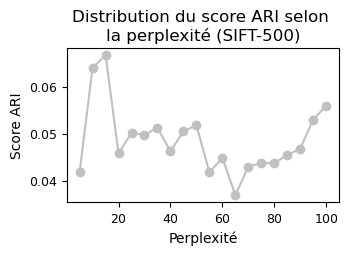

In [24]:
best_perp_500 = p6.best_perplexity(lab_category, keypoints_500, "SIFT-500", 
                                   perp_min = 5, perp_max = 105, step = 5, n_clusters = n_clusters)

Pour le modèle SIFT, le score ARI est : 0.05369


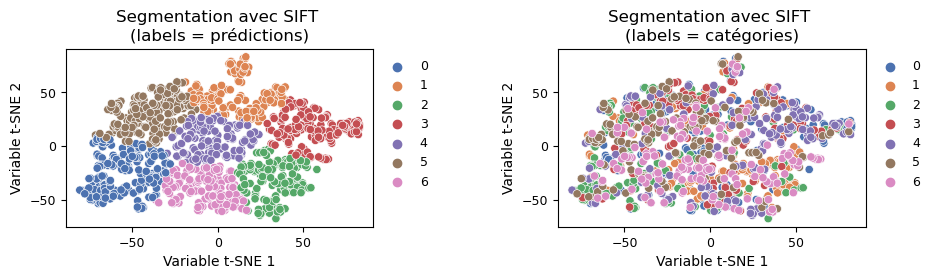

In [25]:
ARI_SIFT_500_db, label_SIFT_500_db = p6.graph_t_sne("SIFT", best_perp_500, keypoints_500, lab_category, n_clusters = 7)

<a class="anchor" id="section_2_2_3_3"></a>
#### Matrice de confusion

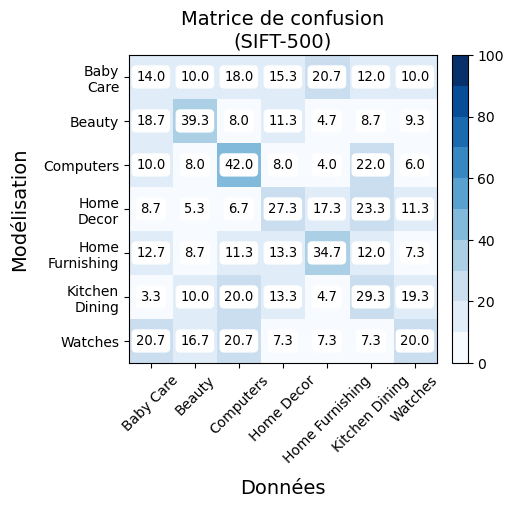

In [26]:
data["label_SIFT_500_db"] = label_SIFT_500_db

p6.graph_matrix(data["category_label"], data["label_SIFT_500_db"], "SIFT-500")

<a class="anchor" id="section_2_2_4"></a>
### Centroïdes = 30

<a class="anchor" id="section_2_2_4_1"></a>
#### Création des histogrammes

In [27]:
mini_k_means_500_sil = MiniBatchKMeans(n_clusters=30,  random_state=0, batch_size=5120).fit(X_descriptors_500)

In [28]:
keypoints_500_sil = histogram_sift(mini_k_means_500_sil, number_image_500, descriptors_500)

Temps de création des features :  124.0


<a class="anchor" id="section_2_2_4_2"></a>
#### Visualisation t-SNE

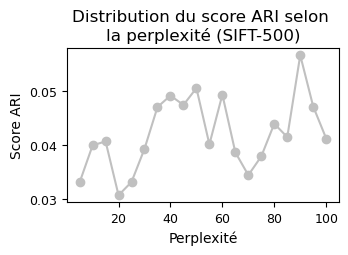

In [29]:
best_perp_500_bis = p6.best_perplexity(lab_category, keypoints_500_sil, "SIFT-500", 
                                       perp_min = 5, perp_max = 105, step = 5, n_clusters = n_clusters)

Pour le modèle SIFT, le score ARI est : 0.05676


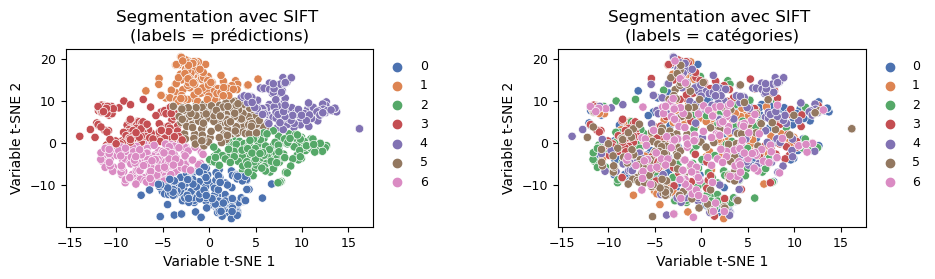

In [30]:
ARI_SIFT_500_sil, label_SIFT_500_sil = p6.graph_t_sne("SIFT", best_perp_500_bis, 
                                                      keypoints_500_sil, lab_category, n_clusters = 7)

<a class="anchor" id="section_2_2_4_3"></a>
#### Matrice de confusion

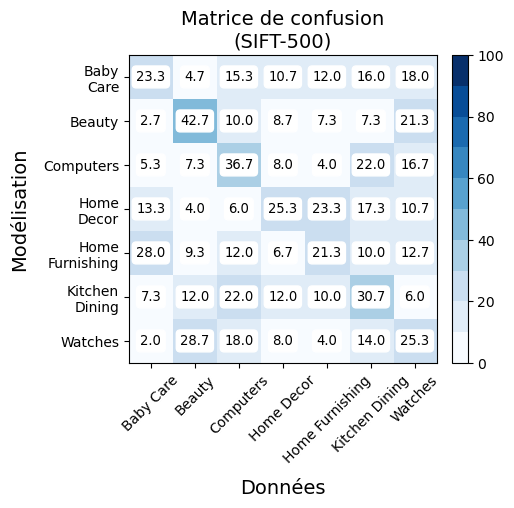

In [31]:
data["label_SIFT_500_sil"] = label_SIFT_500_sil

p6.graph_matrix(data["category_label"], data["label_SIFT_500_sil"], "SIFT-500")

<a class="anchor" id="section_2_3"></a>
## 1000 descripteurs

<a class="anchor" id="section_2_3_1"></a>
### Création des descripteurs

In [32]:
number_image_1000, descriptors_1000 = descriptors_sift(1000)

Temps de créations des descripteurs :  827.0


In [33]:
X_descriptors_1000 = np.asarray(descriptors_1000)

display(X_descriptors_1000.shape)

(989853, 128)

<a class="anchor" id="section_2_3_2"></a>
### Segmentation

In [38]:
time1 = time.time()
inertia_sift_1000 = []
sil_sift_1000 = []
davies_sift_1000 = []

sample_sil = int(round(len(descriptors_1000)/25))

K_range_sift_1000 = range(30, 201)

for k in K_range_sift_1000:
    mini_k_means_1000 = MiniBatchKMeans(n_clusters=k,  random_state = 0, batch_size=5120).fit(X_descriptors_1000)
    inertia_sift_1000.append(mini_k_means_1000.inertia_)
    
    sil = metrics.silhouette_score(X_descriptors_1000, mini_k_means_1000.labels_, sample_size = sample_sil, random_state = 0)
    sil_sift_1000.append(sil)
    
    dav = metrics.davies_bouldin_score(X_descriptors_1000, mini_k_means_1000.labels_)
    davies_sift_1000.append(dav)
        
    if (k % 20 == 0):
        
        time2 = np.round(time.time() - time1, 0)
        print(f"temps {k} clusters : ", time2)

temps 40 clusters :  452.0
temps 60 clusters :  1288.0
temps 80 clusters :  2149.0
temps 100 clusters :  3039.0
temps 120 clusters :  3954.0
temps 140 clusters :  4891.0
temps 160 clusters :  6267.0
temps 180 clusters :  7754.0
temps 200 clusters :  9275.0


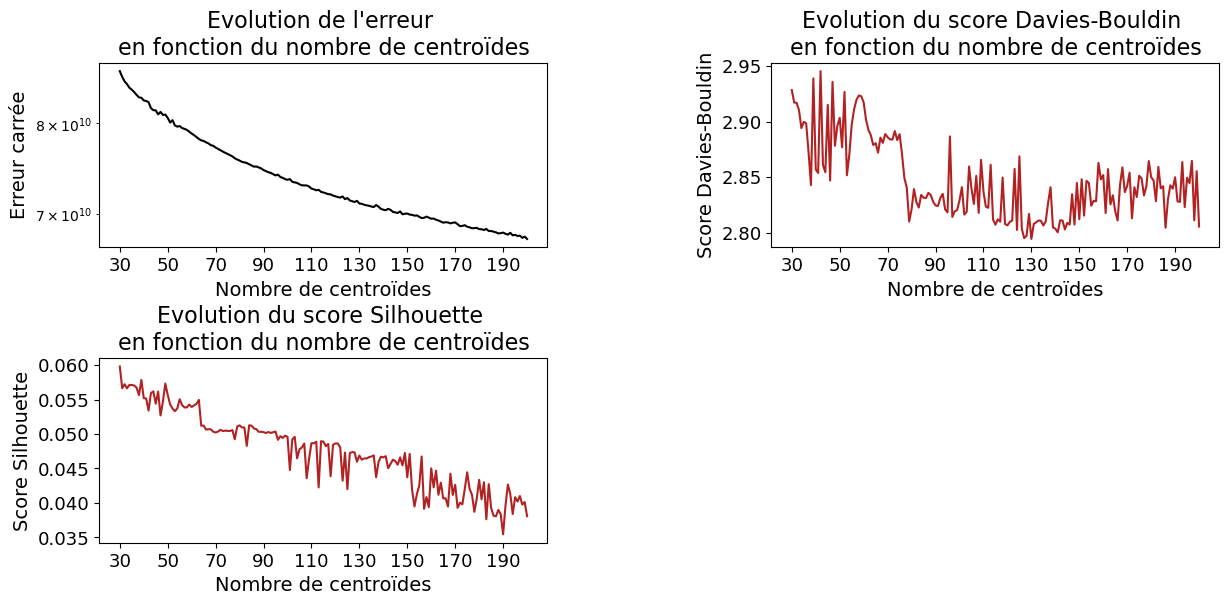

In [39]:
plt.figure(figsize=(14,6))

plt.subplot(221)
plt.plot(K_range_sift_1000, inertia_sift_1000, color="black")

plt.xticks(K_range_sift_1000[::20], fontsize = 13)
plt.yticks(fontsize = 13)

plt.yscale("log")

plt.xlabel("Nombre de centroïdes", fontsize = 14)
plt.ylabel("Erreur carrée", fontsize = 14)

plt.title("Evolution de l'erreur \nen fonction du nombre de centroïdes", fontsize = 16)

plt.subplot(222)

plt.plot(K_range_sift_1000, davies_sift_1000, color="firebrick")

plt.xticks(K_range_sift_1000[::20], fontsize = 13)
plt.yticks(fontsize = 13)

plt.xlabel("Nombre de centroïdes", fontsize = 14)
plt.ylabel("Score Davies-Bouldin", fontsize = 14)

plt.title("Evolution du score Davies-Bouldin \nen fonction du nombre de centroïdes", fontsize = 16)

plt.subplot(223)

plt.plot(K_range_sift_1000, sil_sift_1000, color="firebrick")

plt.xticks(K_range_sift_1000[::20], fontsize = 13)
plt.yticks(fontsize = 13)

plt.xlabel("Nombre de centroïdes", fontsize = 14)
plt.ylabel("Score Silhouette", fontsize = 14)

plt.title("Evolution du score Silhouette \nen fonction du nombre de centroïdes", fontsize = 16)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.6)
plt.show()

<a class="anchor" id="section_2_3_3"></a>
### Centroïdes = 130

<a class="anchor" id="section_2_3_3_1"></a>
#### Création des histogrammes

In [39]:
mini_k_means_1000_db = MiniBatchKMeans(n_clusters=130, random_state = 0, batch_size = 5120).fit(X_descriptors_1000)

In [40]:
keypoints_1000_db = histogram_sift(mini_k_means_1000_db, number_image_1000, descriptors_1000)

Temps de création des features :  234.0


<a class="anchor" id="section_2_3_3_2"></a>
#### Visualisation t-SNE

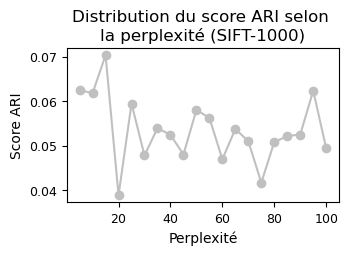

In [41]:
best_perp_1000_bis = p6.best_perplexity(lab_category, keypoints_1000_db, "SIFT-1000", 
                                        perp_min = 5, perp_max = 105, step = 5, n_clusters = n_clusters)

Pour le modèle SIFT-1000, le score ARI est : 0.07076


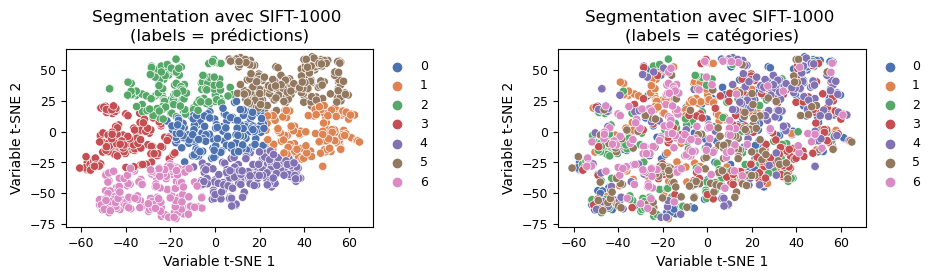

In [42]:
ARI_SIFT_1000_db, label_SIFT_1000_db = p6.graph_t_sne("SIFT-1000", best_perp_1000_bis, 
                                                      keypoints_1000_db, lab_category, n_clusters = 7)

<a class="anchor" id="section_2_3_3_3"></a>
#### Matrice de confusion

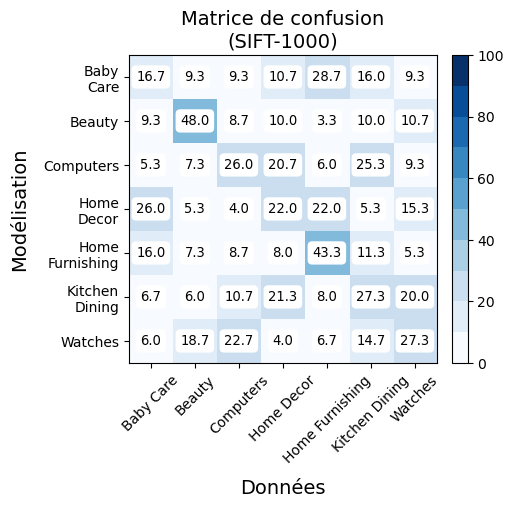

In [43]:
data["label_SIFT_1000_db"] = label_SIFT_1000_db

p6.graph_matrix(data["category_label"], data["label_SIFT_1000_db"], "SIFT-1000")

<a class="anchor" id="section_2_3_4"></a>
### Centroïdes = 30

<a class="anchor" id="section_2_3_4_1"></a>
#### Création des histogrammes

In [34]:
mini_k_means_1000 = MiniBatchKMeans(n_clusters = 30, random_state = 0, batch_size = 5120).fit(X_descriptors_1000)

In [35]:
keypoints_1000 = histogram_sift(mini_k_means_1000, number_image_1000, descriptors_1000)

Temps de création des features :  232.0


<a class="anchor" id="section_2_3_4_2"></a>
#### Visualisation t-SNE

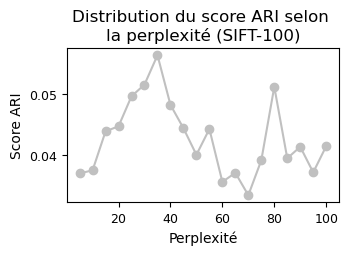

In [36]:
best_perp_1000 = p6.best_perplexity(lab_category, keypoints_1000, "SIFT-100", 
                                    perp_min = 5, perp_max = 105, step = 5, n_clusters = n_clusters)

Pour le modèle SIFT-100, le score ARI est : 0.05645


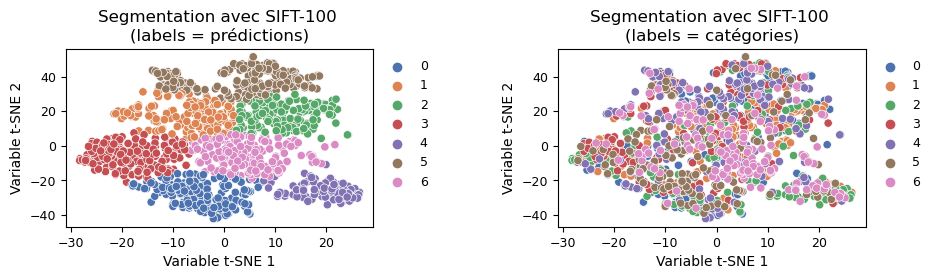

In [37]:
ARI_SIFT_1000_sil, label_SIFT_1000_sil = p6.graph_t_sne("SIFT-1000", best_perp_1000, 
                                                        keypoints_1000, lab_category, n_clusters = 7)

<a class="anchor" id="section_2_3_4_3"></a>
#### Matrice de confusion

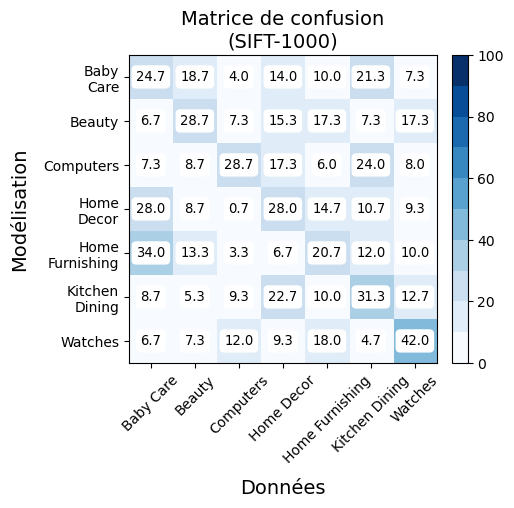

In [38]:
data["label_SIFT_1000_sil"] = label_SIFT_1000_sil

p6.graph_matrix(data["category_label"], data["label_SIFT_1000_sil"], "SIFT-1000")

<a class="anchor" id="section_2_4"></a>
## Test brut

<a class="anchor" id="section_2_4_1"></a>
### Création des descripteurs

In [44]:
number_image_raw, descriptors_raw = descriptors_sift(0)

Temps de créations des descripteurs :  2140.0


In [45]:
X_descriptors_raw = np.asarray(descriptors_raw)

display(X_descriptors_raw.shape)

(9050855, 128)

<a class="anchor" id="section_2_4_2"></a>
### Segmentation

In [53]:
time1 = time.time()
inertia_sift_raw = []
sil_sift_raw = []
davies_sift_raw = []

# sample_sil = int(round(len(descriptors_raw)/25))

K_range_sift_raw = range(30, 201)

for k in K_range_sift_raw:
    mini_k_means_raw = MiniBatchKMeans(n_clusters=k,  random_state = 0, batch_size=5120).fit(X_descriptors_raw)
    inertia_sift_raw.append(mini_k_means_raw.inertia_)
    
#     sil = metrics.silhouette_score(X_descriptors_raw, mini_k_means_raw.labels_, sample_size = sample_sil, random_state = 0)
#     sil_sift_raw.append(sil)
    
    dav = metrics.davies_bouldin_score(X_descriptors_raw, mini_k_means_raw.labels_)
    davies_sift_raw.append(dav)
        
    if (k % 20 == 0):
        
        time2 = np.round(time.time() - time1, 0)
        print(f"temps {k} clusters : ", time2)

In [54]:
plt.figure(figsize=(14,3))

plt.subplot(121)
plt.plot(K_range_sift_raw, inertia_sift_raw, color="black")

plt.xticks(K_range_sift_raw[::20], fontsize = 13)
plt.yticks(fontsize = 13)

plt.yscale("log")

plt.xlabel("Nombre de centroïdes", fontsize = 14)
plt.ylabel("Erreur carrée", fontsize = 14)

plt.title("Evolution de l'erreur \nen fonction du nombre de centroïdes", fontsize = 16)

plt.subplot(122)

plt.plot(K_range_sift_raw, davies_sift_raw, color="firebrick")

plt.xticks(K_range_sift_raw[::20], fontsize = 13)
plt.yticks(fontsize = 13)

plt.xlabel("Nombre de centroïdes", fontsize = 14)
plt.ylabel("Score Davies-Bouldin", fontsize = 14)

plt.title("Evolution du score Davies-Bouldin \nen fonction du nombre de centroïdes", fontsize = 16)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.6)
plt.show()

In [55]:
min_index = davies_sift_raw.index(min(davies_sift_raw))
display(K_range_sift_raw[min_index])

<a class="anchor" id="section_2_4_3"></a>
###  Centroïdes = 178

<a class="anchor" id="section_2_4_3_1"></a>
#### Création des histogrammes

In [46]:
mini_k_means_raw = MiniBatchKMeans(n_clusters=178, random_state = 0, batch_size = 5120).fit(X_descriptors_raw)

In [47]:
keypoints_raw = histogram_sift(mini_k_means_raw, number_image_raw, descriptors_raw)

Temps de création des features :  1905.0


<a class="anchor" id="section_2_4_3_2"></a>
#### Visualisation t-SNE

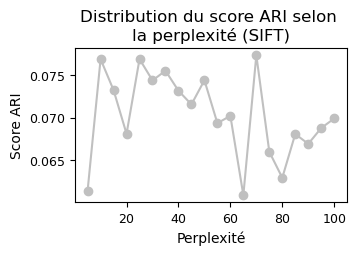

In [48]:
best_perp_raw = p6.best_perplexity(lab_category, keypoints_raw, "SIFT", 
                                   perp_min = 5, perp_max = 105, step = 5, n_clusters = n_clusters)

Pour le modèle SIFT, le score ARI est : 0.07758


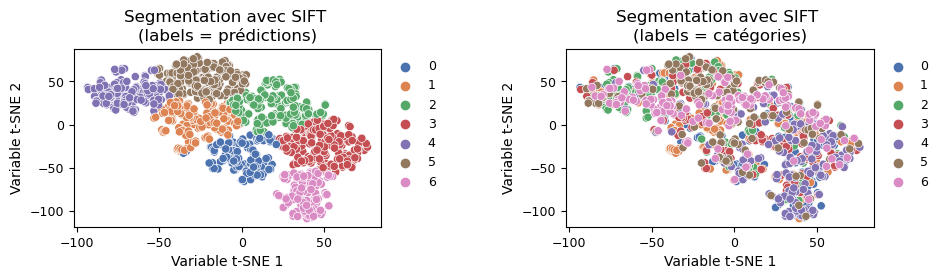

In [49]:
ARI_SIFT_raw, label_SIFT_raw = p6.graph_t_sne("SIFT", 10, keypoints_raw, lab_category, n_clusters = 7)

<a class="anchor" id="section_2_4_3_3"></a>
#### Matrice de confusion

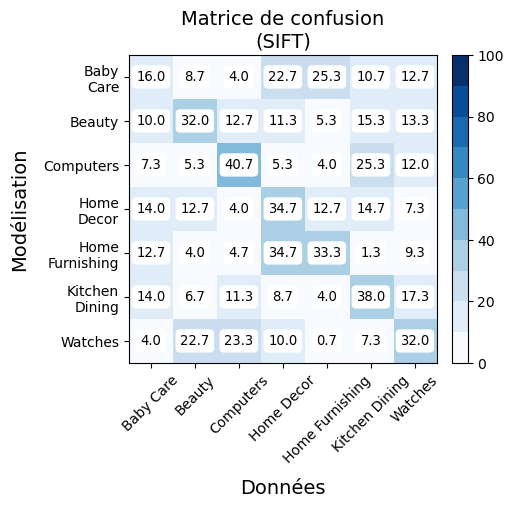

In [50]:
data["label_SIFT_raw"] = label_SIFT_raw

p6.graph_matrix(data["category_label"], data["label_SIFT_raw"], "SIFT")

In [51]:
df_raw = pd.DataFrame(list(zip(number_image_raw, descriptors_raw)), columns = [["Numéro_image", "Descripteur"]])

display(int((round(df_raw["Numéro_image"].value_counts().mean()))))

df_1000 = pd.DataFrame(list(zip(number_image_1000, descriptors_1000)), columns = [["Numéro_image", "Descripteur"]])

display(int((round(df_1000["Numéro_image"].value_counts().mean()))))

df_500 = pd.DataFrame(list(zip(number_image_500, descriptors_500)), columns = [["Numéro_image", "Descripteur"]])

display(int((round(df_500["Numéro_image"].value_counts().mean()))))

df_100 = pd.DataFrame(list(zip(number_image_100, descriptors_100)), columns = [["Numéro_image", "Descripteur"]])

display(int((round(df_100["Numéro_image"].value_counts().mean()))))

8620

943

493

100

In [52]:
display(ARI_SIFT_100_db, ARI_SIFT_1000_db, ARI_SIFT_500_db, ARI_SIFT_raw)

0.04101

0.07076

0.05369

0.07758

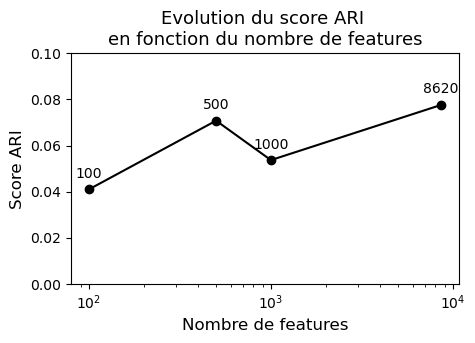

In [53]:
score_ARI_SIFT = [ARI_SIFT_100_db, ARI_SIFT_1000_db, ARI_SIFT_500_db, ARI_SIFT_raw]
val_nfeatures_raw = int((round(df_raw["Numéro_image"].value_counts().mean())))
nfeatures = [100, 500, 1000, val_nfeatures_raw]


plt.figure(figsize=(5,3))
plt.plot(nfeatures, score_ARI_SIFT, color = "black", marker="o")

for i in range(0,len(score_ARI_SIFT)):
    plt.text(nfeatures[i], score_ARI_SIFT[i] + 0.005, f"{nfeatures[i]}", ha="center")

plt.xscale("log")

plt.ylim(0,0.1)

plt.xlabel("Nombre de features", fontsize = 12)
plt.ylabel("Score ARI", fontsize = 12)

plt.title("Evolution du score ARI \nen fonction du nombre de features", fontsize = 13)

plt.show()

Comme nous pouvons le voir, l'algorithme SIFT n'est pas idéal dans la mesure où les score ARIs sont très faibles. De plus, les correspondances entre chaque catégorie est loin d'être satisfaisante, et ce, quelque soit le nombre de descripteurs.

Nous allons tester l'algorithme ORB.
<a class="anchor" id="chapter3"></a>
# Chapitre 3 : Oriented FAST and Rotated BRIEF (ORB)

<a class="anchor" id="section_3_1"></a>
## Création des descripteurs

In [54]:
number_image_raw_orb, descriptors_raw_orb = descriptors_orb(0)

Temps de créations des descripteurs :  56.0


In [55]:
X_descriptors_raw_orb = np.asarray(descriptors_raw_orb)

display(X_descriptors_raw_orb.shape)

(520174, 32)

<a class="anchor" id="section_3_2"></a>
## Segmentation

In [57]:
time1 = time.time()
inertia_orb_raw = []
sil_orb_raw = []
davies_orb_raw = []

sample_sil = int(round(len(X_descriptors_raw_orb)/25))

K_range_orb_raw = range(30, 201)

for k in K_range_orb_raw:
    mini_k_means_raw = MiniBatchKMeans(n_clusters=k,  random_state = 0, batch_size=5120).fit(X_descriptors_raw_orb)
    inertia_orb_raw.append(mini_k_means_raw.inertia_)
    
    sil = metrics.silhouette_score(X_descriptors_raw_orb, mini_k_means_raw.labels_, 
                                   sample_size = sample_sil, random_state = 0)
    sil_orb_raw.append(sil)
    
    dav = metrics.davies_bouldin_score(X_descriptors_raw_orb, mini_k_means_raw.labels_)
    davies_orb_raw.append(dav)
        
    if (k % 20 == 0):
        
        time2 = np.round(time.time() - time1, 0)
        print(f"temps {k} clusters : ", time2)

In [58]:
plt.figure(figsize=(14,6))

plt.subplot(221)
plt.plot(K_range_orb_raw, inertia_orb_raw, color="black")

plt.xticks(K_range_orb_raw[::20], fontsize = 13)
plt.yticks(fontsize = 13)

plt.yscale("log")

plt.xlabel("Nombre de centroïdes", fontsize = 14)
plt.ylabel("Erreur carrée", fontsize = 14)

plt.title("Evolution de l'erreur \nen fonction du nombre de centroïdes", fontsize = 16)

plt.subplot(222)

plt.plot(K_range_orb_raw, davies_orb_raw, color="firebrick")

plt.xticks(K_range_orb_raw[::20], fontsize = 13)
plt.yticks(fontsize = 13)

plt.xlabel("Nombre de centroïdes", fontsize = 14)
plt.ylabel("Score Davies-Bouldin", fontsize = 14)

plt.title("Evolution du score Davies-Bouldin \nen fonction du nombre de centroïdes", fontsize = 16)

plt.subplot(223)

plt.plot(K_range_orb_raw, sil_orb_raw, color="firebrick")

plt.xticks(K_range_sift_500[::20], fontsize = 13)
plt.yticks(fontsize = 13)

plt.xlabel("Nombre de centroïdes", fontsize = 14)
plt.ylabel("Score Silhouette", fontsize = 14)

plt.title("Evolution du score Silhouette \nen fonction du nombre de centroïdes", fontsize = 16)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.6)
plt.show()

In [59]:
min_index = sil_orb_raw.index(max(sil_orb_raw))
display(K_range_orb_raw[min_index])

In [60]:
min_index = davies_orb_raw.index(min(davies_orb_raw))
display(K_range_orb_raw[min_index])

<a class="anchor" id="section_3_3"></a>
## Centroïdes = 35
<a class="anchor" id="section_3_3_1"></a>
### Création des histogrammes

In [61]:
mini_k_means_raw_orb = MiniBatchKMeans(n_clusters=35, random_state = 0, batch_size = 5120).fit(X_descriptors_raw_orb)

In [62]:
keypoints_raw_orb = histogram_sift(mini_k_means_raw_orb, number_image_raw_orb, descriptors_raw_orb)

Temps de création des features :  78.0


<a class="anchor" id="section_3_3_2"></a>
### Visualisation t-SNE

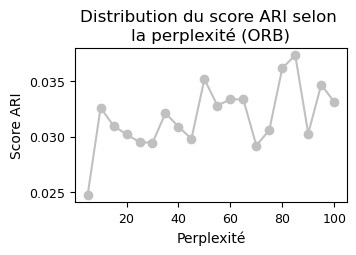

In [63]:
best_perp_orb = p6.best_perplexity(lab_category, keypoints_raw_orb, "ORB", 
                                   perp_min = 5, perp_max = 105, step = 5, n_clusters = n_clusters)

Pour le modèle ORB, le score ARI est : 0.03731


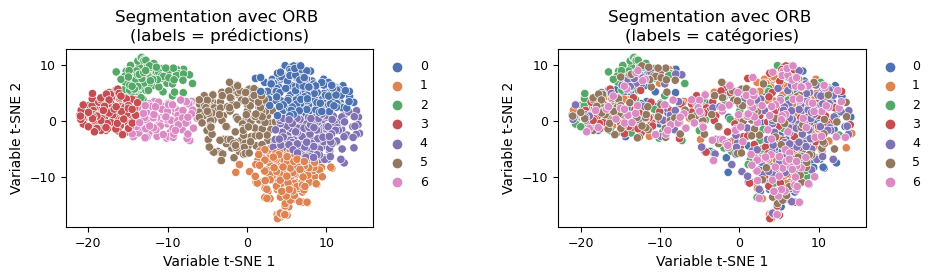

In [64]:
ARI_ORB_raw_sil, label_ORB_raw_sil = p6.graph_t_sne("ORB", best_perp_orb, 
                                                    keypoints_raw_orb, lab_category, n_clusters = 7)

<a class="anchor" id="section_3_3_3"></a>
### Matrice de confusion

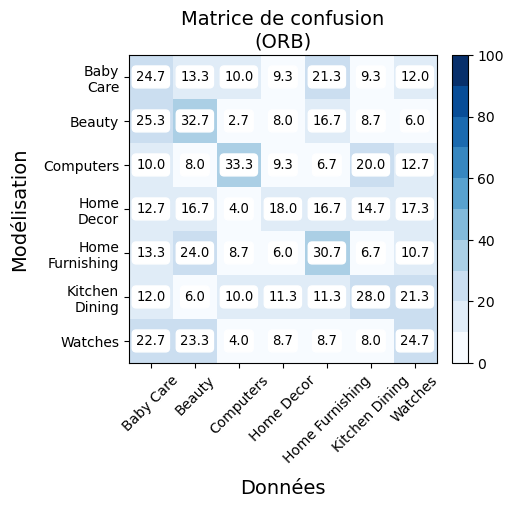

In [65]:
data["label_ORB_raw_sil"] = label_ORB_raw_sil

p6.graph_matrix(data["category_label"], data["label_ORB_raw_sil"], "ORB")

<a class="anchor" id="section_3_4"></a>
## Centroïdes = 166
<a class="anchor" id="section_3_4_1"></a>
### Création des histogrammes

In [66]:
mini_k_means_raw_orb_db = MiniBatchKMeans(n_clusters=166, random_state = 0, batch_size = 5120).fit(X_descriptors_raw_orb)

In [67]:
keypoints_raw_orb_db = histogram_sift(mini_k_means_raw_orb_db, number_image_raw_orb, descriptors_raw_orb)

Temps de création des features :  80.0


<a class="anchor" id="section_3_4_2"></a>
### Visualisation t-SNE

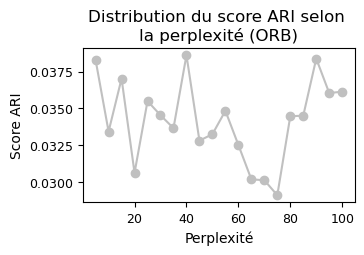

In [68]:
best_perp_orb_bis = p6.best_perplexity(lab_category, keypoints_raw_orb_db, "ORB", 
                                       perp_min = 5, perp_max = 105, step = 5, n_clusters = n_clusters)

Pour le modèle ORB, le score ARI est : 0.03862


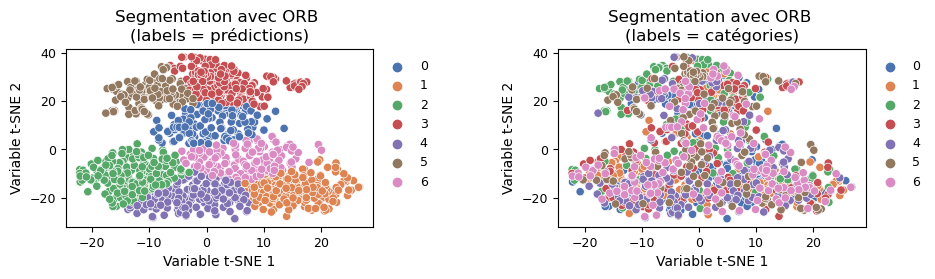

In [69]:
ARI_ORB_raw_db, label_ORB_raw_db = p6.graph_t_sne("ORB", best_perp_orb_bis, 
                                                  keypoints_raw_orb_db, lab_category, n_clusters = 7)

<a class="anchor" id="section_3_4_3"></a>
### Matrice de confusion

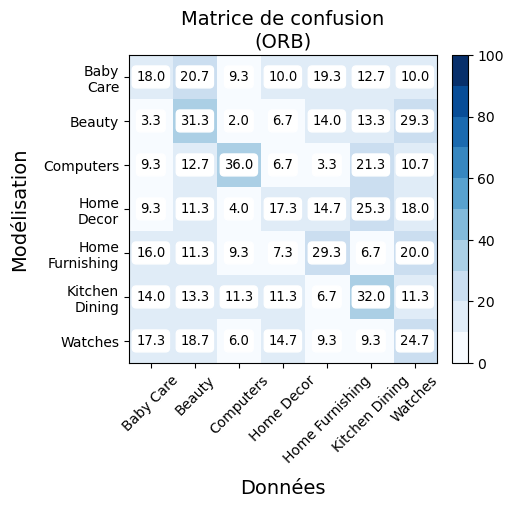

In [70]:
data["label_ORB_raw_db"] = label_ORB_raw_db

p6.graph_matrix(data["category_label"], data["label_ORB_raw_db"], "ORB")

Tout comme l'algorithme SIFT, l'algorithme ORB nous donne des résultats insatisfaisants.

Dans le prochain notebook, nous allons travailler sur l'algorithme CNN qui devrait donner de meilleurs résultats.